# Textmining

## Überblick

Beim Textmining geht es um die Anwendung der in den vergangenen Kapiteln besprochenen Methoden auf textuelle Daten mit dem Ziel Wissen aus den Daten zu gewinnen. Beispiele für Textmining sind die Analyse von Kundenbewertungen bezüglich der Emotion und Meinung (engl. *sentiment*) oder die automatische Gruppierung ähnlicher Dokumente. Das Problem bei der Analyse von natürlicher Sprache ist das das Sätze und längere Texte weder numerisch noch kategorisch sind. Es gibt also keine offensichtliche Darstellung durch Merkmale. Hinzu kommt, das Text oft eine innere Struktur hat, zum Beispiel durch Überschriften, Einleitungen, oder Referenzen zu verwandten Inhalten. Wenn wir Text lesen, erkennen wir diese semantische Struktur automatisch und ordnen diese ein. Daher ist es die große Herausforderung des Textmining eine geeignete Struktur der textuellen Daten für das maschinelle Lernen zu finden. 

Hierfür müssen wir den Text *kodieren* um eine numerische oder kategorische Repräsentation zu erhalten. Ziel der Repräsentation sollte sein möglichst wenig relevante Information aus dem Text zu verlieren. Eine idealle Kodiering beihaltet daher nicht nur die Worte, sondern auch die *Bedeutung* der Worte im jeweiligen *Kontext*, die grammatikalische Struktur, und eventuell sogar den Gesamtkontext eines Satzes innerhalb eines Dokuments. Aufgrund dieser komplexität ist die Repräsentation von Texten für das maschinelle Lernen immernoch der Gegenstand der aktuellen Forschung. Durch Fortschritte der letzten Jahre wird das Textmining jedoch zu einem immer mächtigeren und zuverlässigeren Werkzeug. Das Textmining selbst ist ein großes Gebiet, bei dem wir hier nur an der Oberfläche kratzen könnten. Das Ziel dieses Kapitels ist es, dass wir ein gutes Verständnis der Herausforderungen vom Textmining bekommen, grundlegende Verfahren kennen, und außerdem Wissen wie fortgeschrittene Verfahren arbeiten. 

Also Beispiel nutzen wir in diesem Kapitel acht Tweets von Donald Trump. Die Verarbeitungsschritte die wir zeigen haben alles das Ziel, die Analyse des Themas der Tweets zu erlauben. 

In [1]:
from textwrap import TextWrapper

tweets_list = ['Oct 4, 2018 08:03:25 PM Beautiful evening in Rochester, Minnesota. VOTE, VOTE, VOTE! https://t.co/SyxrxvTpZE [Twitter for iPhone]',
               'Oct 4, 2018 07:52:20 PM Thank you Minnesota - I love you! https://t.co/eQC2NqdIil [Twitter for iPhone]',
               'Oct 4, 2018 05:58:21 PM Just made my second stop in Minnesota for a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley to the U.S. Senate, and we need the strong leadership of @TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S. House! [Twitter for iPhone]',
               'Oct 4, 2018 05:17:48 PM Congressman Bishop is doing a GREAT job! He helped pass tax reform which lowered taxes for EVERYONE! Nancy Pelosi is spending hundreds of thousands of dollars on his opponent because they both support a liberal agenda of higher taxes and wasteful spending! [Twitter for iPhone]',
               'Oct 4, 2018 02:29:27 PM "U.S. Stocks Widen Global Lead" https://t.co/Snhv08ulcO [Twitter for iPhone]',
               'Oct 4, 2018 02:17:28 PM Statement on National Strategy for Counterterrorism: https://t.co/ajFBg9Elsj https://t.co/Qr56ycjMAV [Twitter for iPhone]',
               'Oct 4, 2018 12:38:08 PM Working hard, thank you! https://t.co/6HQVaEXH0I [Twitter for iPhone]',
               'Oct 4, 2018 09:17:01 AM This is now the 7th. time the FBI has investigated Judge Kavanaugh. If we made it 100, it would still not be good enough for the Obstructionist Democrats. [Twitter for iPhone]']

wrapper = TextWrapper(width=65)
for tweet in tweets_list:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

Oct 4, 2018 08:03:25 PM Beautiful evening in Rochester,
Minnesota. VOTE, VOTE, VOTE! https://t.co/SyxrxvTpZE [Twitter for
iPhone]

Oct 4, 2018 07:52:20 PM Thank you Minnesota - I love you!
https://t.co/eQC2NqdIil [Twitter for iPhone]

Oct 4, 2018 05:58:21 PM Just made my second stop in Minnesota for
a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley
to the U.S. Senate, and we need the strong leadership of
@TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S.
House! [Twitter for iPhone]

Oct 4, 2018 05:17:48 PM Congressman Bishop is doing a GREAT job!
He helped pass tax reform which lowered taxes for EVERYONE! Nancy
Pelosi is spending hundreds of thousands of dollars on his
opponent because they both support a liberal agenda of higher
taxes and wasteful spending! [Twitter for iPhone]

Oct 4, 2018 02:29:27 PM "U.S. Stocks Widen Global Lead"
https://t.co/Snhv08ulcO [Twitter for iPhone]

Oct 4, 2018 02:17:28 PM Statement on National Strategy for
Counterterrorism: 

## Preprocessing

Durch das Preprocessing wird der Text in eine Repräsentation überführt, die für maschinelles Lernen geeignet ist, also mit der man den Text klassifzieren oder clustern kann. 

### Erstellung eines Korpus

Der erste Preprocessing-Schritt ist die Erstellung eines *Korpus* von *Dokumenten*. Im Sinne der in [Kapitel 4](kapitel_10) eingeführten Begriffe, sind die Dokumente die Objekte und ein Korpus eine Menge von Objekten. In unserem Twitter-Beispiel ist der Korpus eine die Menge von Tweets, jeder Tweet ist ein Dokument. In unserem Fall haben wir bereits eine Liste von Tweets, was einem Korpus entspricht. In anderen Anwendungsfällen, kann die Erstellung des Korpus aufwendiger sein. Dies wäre zum Beispiel der Fall, wenn erst Bewertungen eines Produkts durch Crawling aus dem Internet gesammelt werden müssen. Hierbei ist es relativ wahrscheinlich, dass es auf der gleichen Webseite mehrere Reviews gibt. Diese müssen dann zum Beispiel innerhalb der Webseite identifiziert und anschließend in separate Dokumente aufgeteilt werden. 

### Relevanter Inhalt

Die textuellen Daten beinhalten oft irrelavante Informationen für einen bestimmten Anwendungsfall, insbesondere wenn der Text automatisch aus dem Internet gesammelt wurde. Wenn wir am Thema von Tweets interessiert sind, ist der Zeitstempel irrelevant. Es ist ebenfalls nicht wichtig, ob ein Tweet mit einem iPhone oder einer anderen Anwendung verschickt wurde. Links zu Webseiten sind ein knifflig, da sie relevante Informationen enthalten könnten, jedoch auch irrelevant sein können. Wenn eine URL relevante Informationen, wie zum Beispiel den Autoren oder das Thema ähnlich zu einer Überschrift enthält, kann dies Wertvoll für das Textmining sein. Andere Aspekte, wie zum Beispiel das http(s):// zu Beginn eines Links, sind irrelevant. Es gibt auch Links die keine Relevanten informationen enthalten, zum Beispiel wenn Link Shortener benutzt werden. Dann ist der Link nur eine zufällige Zeichenkette. Ob Links beibehalten werden sollen, muss man daher von Anwendungsfall zu Anwendungsfall entscheiden. 

Wenn wir den irrelevanten Inhalt der Tweets (inkl. Links) entfernen, bekommen wir folgendes:

In [2]:
import re

tweets_relevant_content = []
for tweet in tweets_list:
    # remove the first 24 chars, because they are the time stamp
    # remove everything after last [ because this is the source of the tweet
    modified_tweet = tweet[24:tweet.rfind('[')]
    # drop links
    modified_tweet = re.sub(r'http\S+', '', modified_tweet).strip()
    tweets_relevant_content.append(modified_tweet)

for tweet in tweets_relevant_content:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

Beautiful evening in Rochester, Minnesota. VOTE, VOTE, VOTE!

Thank you Minnesota - I love you!

Just made my second stop in Minnesota for a MAKE AMERICA GREAT
AGAIN rally. We need to elect @KarinHousley to the U.S. Senate,
and we need the strong leadership of @TomEmmer, @Jason2CD,
@JimHagedornMN and @PeteStauber in the U.S. House!

Congressman Bishop is doing a GREAT job! He helped pass tax
reform which lowered taxes for EVERYONE! Nancy Pelosi is spending
hundreds of thousands of dollars on his opponent because they
both support a liberal agenda of higher taxes and wasteful
spending!

"U.S. Stocks Widen Global Lead"

Statement on National Strategy for Counterterrorism:

Working hard, thank you!

This is now the 7th. time the FBI has investigated Judge
Kavanaugh. If we made it 100, it would still not be good enough
for the Obstructionist Democrats.



Was relevant und irrelevant ist, hängt auch vom Kontext ab. Ein anderer Anwendungsfall für unsere Twitterdaten wäre die Analyse der Quelle der Tweets, um zum Beispiel zu herauszufinden ob es einen Unterschied macht ob ein Tweet von einem Handy oder von einem Computer verschickt wurde. In diesem Fall kann man die Quelle nicht einfach entfernen, da man sie zur Gruppierung der Tweets braucht. Wenn man wissen möchte, wie sich Tweets im Laufe der Zeit verändern, dann sind die Zeitstempel wichtig. In beiden Fällen würde man aber diese Informationen trotzdem aus dem eigentlichen Text entfernen, und sie stattdesen als separate Merkmale speichern, da es sich um Metadaten über die Dokumente handelt. 

### Zeichensetzung und Großschreibung

Für das Thema von Dokumenten sind die Zeichensetzung und die Groß- und Kleinschreibung von Buchstaben in der Regel nicht Hilfreich. Stattdessen führen sie dazu, dass es ungewollte unterschiede zwischen Worten gibt. Eine Ausnahme von dieser Regel sind Abkürzungen und Akronyme. Das Akronym `U.S.` der Tweets ein ein perfektes Beispiel hierfür, da es zum Wort `us` werden würde, wenn man einfach alle Zeichen entfernen und alle Buchstaben zu kleinbuchstaben machen würde. Wir würden also eine ganz andere Bedeutung haben. Wenn solche Fälle bekannt ist, sollte man diese manuell adressieren, bevor die Zeichensetzung und Großschreibung entfernt wird. Man könnte zum Beispiel `US` und `U.S.` zu `usa` umwandeln, um zu verhindern das es ein Problem gibt. 

Wenn wir dies bei den Tweets anwenden, bekommen wir folgende Dokumente. 

In [3]:
import string
tweets_lowercase = []

for tweet in tweets_relevant_content:
    modified_tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    modified_tweet = modified_tweet.replace('US', 'usa')
    modified_tweet = modified_tweet.lower()
    tweets_lowercase.append(modified_tweet)
    
for tweet in tweets_lowercase:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening in rochester minnesota vote vote vote

thank you minnesota  i love you

just made my second stop in minnesota for a make america great
again rally we need to elect karinhousley to the usa senate and
we need the strong leadership of tomemmer jason2cd jimhagedornmn
and petestauber in the usa house

congressman bishop is doing a great job he helped pass tax reform
which lowered taxes for everyone nancy pelosi is spending
hundreds of thousands of dollars on his opponent because they
both support a liberal agenda of higher taxes and wasteful
spending

usa stocks widen global lead

statement on national strategy for counterterrorism

working hard thank you

this is now the 7th time the fbi has investigated judge kavanaugh
if we made it 100 it would still not be good enough for the
obstructionist democrats



### Stoppwörter

Eine weitere Eigenschaft von Text ist, dass nicht jedes Wort relevant für die Bedeutung ist. Oft werden Worte nur für die korrekte grammatikalische Struktur benötigt, ohne dass sie die Bedeutung eines Dokuments beeinflussen. Beispiel dafür sind Artikel (der, die, das, den, dem, bzw. auf Englisch the, a). Außerdem gibt es noch Worte, die sehr häufig vorkommen, unabhängig vom Inhalt, zum Beispiel die verschiedenen Formen von sein und haben. Daher ist es ein üblicher Preprocessing-Schritt solche Worte zu entfernen. Hierzu nutzt man Wortlisten, die es für viele Sprachen als Teil von Textverarbeitungsbibliotheken gibt. 

Mit einer englischen Stoppwortliste verändern sich unsere Tweets wie folgt.

In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# this needs only to be run once
# uncomment this line to download the stopword and punctuation lists
# import nltk; nltk.download('stopwords'); nltk.download('punkt')

stop_words = set(stopwords.words('english')) 

tweets_no_stopwords = []
for tweet in tweets_lowercase:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([w for w in tweet_tokens if not w in stop_words])
    tweets_no_stopwords.append(modified_tweet)
    
for tweet in tweets_no_stopwords:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening rochester minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great rally need elect
karinhousley usa senate need strong leadership tomemmer jason2cd
jimhagedornmn petestauber usa house

congressman bishop great job helped pass tax reform lowered taxes
everyone nancy pelosi spending hundreds thousands dollars
opponent support liberal agenda higher taxes wasteful spending

usa stocks widen global lead

statement national strategy counterterrorism

working hard thank

7th time fbi investigated judge kavanaugh made 100 would still
good enough obstructionist democrats



### Stemming und Lemmatisierung

Für die gleiche Grundform gibt es oft viele grammatikalische Formen (z.B. Singular und Plural), was zu verschiedenen Schreibweisen führt. Außerdem gibt es verwandte Verben, Adjektive und Nomen. Hinzu kommen Synonyme, also mehere Worte mit der gleichen Bedeutung. Für das Textmining ist es wichtig, dass der wir erkennen, dass es sich eigentlich um die gleiche Bedeutung handelt. Ein Ansatz ist, das man probiert alle Worte auf ein gemeinsames Merkmal abzubilden. Stemming und Lemmatisierung sind zwei Methoden, mit denen man dies erreichen kann. 

Beim Stemming werden Worte auf ihren Stamm reduziert. Aus dem Deutschen `lachte` und `lachen` wird `lach`, aus dem Englischen `spending` und `spends` wird `spend`. Für das Stemming wird in der Regel ein algorithmischer Ansatz verwendet, zum Beispiel Porters Algorithmus [^porter]. Der Nachteil des Stemming ist, das man nur Worte auf ihren Stamm reduzieren kann. Ähnliche Worte mit einem anderen Stamm werden nicht vereintlicht, zum Beispiel `gewinnen` und `gewann` oder `good` und `well`. 

Bei der Lemmatisierung wird mit Wortlisten gearbeitet. Diese Wortlisten definieren, welche Worte als synonyme behandelt werden sollen. Anschließend kann man eines der Synonyme auswählen. Auf diese Art könnte man zum Beispiel alle Formen von `good` erkennen, inbesondere auch Formen wie `well`, die nicht den gleichen Wortstamm haben. Die Lemmatisierung ist jedoch nur so mächstig, wie es die Wortlisten zulassen. 

Wenn man sowohl Lemmatisierung, als auch Stemming anwenden möchte, sollte man immer zuerst Lemmatisieren. Der Grund ist, das die durch das Stemming gefundenen Wortstämme nicht immer Worte sind, die es in der natürlichen Sprache gibt. Entsprechend gäbe es auch keine Einträge in den Wortlisten für das Lemmatisieren. Man würde also die Mächtigkeit der Lemmatisierung reduzieren, wenn man zuerst Stemming anwendet. 

Für unsere Tweets verwenden wir zuerst eine Lemmatisierung mit einer englischen Wortliste.

[^porter]: https://doi.org/10.1108/eb046814

In [7]:
# The following two lines must be run once in each environment
# This downloads the list from nltk for lemmatization
# import nltk; nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# the wordnet lemmatizer does not only harmonize synonyms but also performs some stemming
lemmatizer = WordNetLemmatizer() 

tweets_lemmatization = []
for tweet in tweets_no_stopwords:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([lemmatizer.lemmatize(w) for w in tweet_tokens])
    tweets_lemmatization.append(modified_tweet)
    
for tweet in tweets_lemmatization:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening rochester minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great rally need elect
karinhousley usa senate need strong leadership tomemmer jason2cd
jimhagedornmn petestauber usa house

congressman bishop great job helped pas tax reform lowered tax
everyone nancy pelosi spending hundred thousand dollar opponent
support liberal agenda higher tax wasteful spending

usa stock widen global lead

statement national strategy counterterrorism

working hard thank

7th time fbi investigated judge kavanaugh made 100 would still
good enough obstructionist democrat



Einige Wörter wurden ersetzt, aus `stocks` wurde zum Beispiel `stock`. Mit Stemming erhalten wir folgende Veränderungen. 

In [9]:
from nltk.stem import PorterStemmer

# porter stemming is a linguistic algorithm that provides additional stemming
stemmer = PorterStemmer()

tweets_stemming = []
for tweet in tweets_lemmatization:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([stemmer.stem(w) for w in tweet_tokens])
    tweets_stemming.append(modified_tweet)
    
for tweet in tweets_stemming:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beauti even rochest minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great ralli need elect
karinhousley usa senat need strong leadership tomemm jason2cd
jimhagedornmn petestaub usa hous

congressman bishop great job help pa tax reform lower tax everyon
nanci pelosi spend hundr thousand dollar oppon support liber
agenda higher tax wast spend

usa stock widen global lead

statement nation strategi counterterror

work hard thank

7th time fbi investig judg kavanaugh made 100 would still good
enough obstructionist democrat



Viele der Worte sind jetzt kürzer, unter anderem wurde `hundred` auf `hundr`, `wasteful` auf `wast` und `spending` auf `spend` reduziert. Zwei dieser Beispiel sind keine echten Wörter mehr, da die Wortstämme `hundr` und `wast` nicht in der englischen Sprache vorkommen.

### Visualisierung des Preprocessings

Eine einfache Möglichkeit textuelle Daten zu visualisierungen sind Wordclouds. Wordclouds zeigen wichtige Worte, die in Texten häufig vorkommen. Je häufiger ein Wort vorkommt, desto größer wird es dargestellt. Mit Hilfe von Wordclouds wir uns gut die Auswirkungen der Preprocessing Schritte auf unsere Tweets veranschaulichen. 

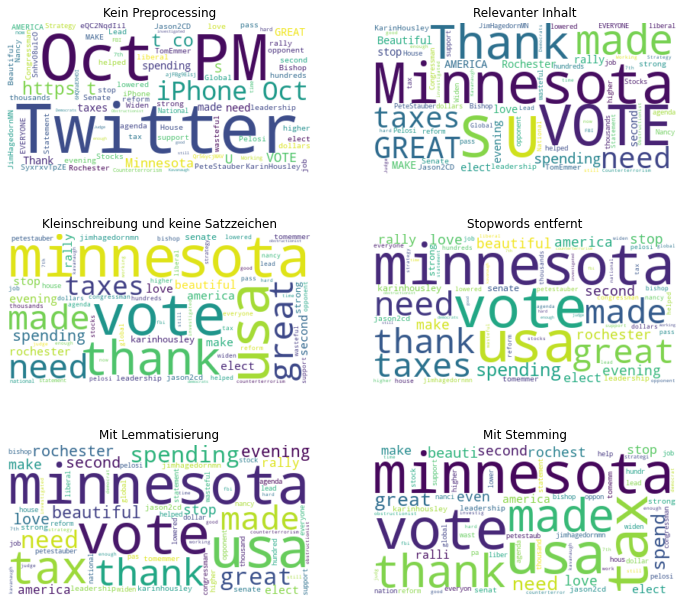

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_raw = WordCloud(background_color="white")
wc_raw.generate(' '.join(tweets_list))

wc_relevant = WordCloud(background_color="white")
wc_relevant.generate(' '.join(tweets_relevant_content))

wc_lowercase = WordCloud(background_color="white")
wc_lowercase.generate(' '.join(tweets_lowercase))

wc_stopwords = WordCloud(background_color="white")
wc_stopwords.generate(' '.join(tweets_no_stopwords))

wc_lemma = WordCloud(background_color="white")
wc_lemma.generate(' '.join(tweets_lemmatization))

wc_stemming = WordCloud(background_color="white")
wc_stemming.generate(' '.join(tweets_stemming))

fig, axes = plt.subplots(3, 2, figsize=(12, 11))
axes[0, 0].axis("off")
axes[0, 0].imshow(wc_raw, interpolation="bilinear")
axes[0, 0].set_title('Kein Preprocessing')

axes[0, 1].axis("off")
axes[0, 1].imshow(wc_relevant, interpolation="bilinear")
axes[0, 1].set_title('Relevanter Inhalt')

axes[1, 0].axis("off")
axes[1, 0].imshow(wc_lowercase, interpolation="bilinear")
axes[1, 0].set_title('Kleinschreibung und keine Satzzeichen')

axes[1, 1].axis("off")
axes[1, 1].imshow(wc_stopwords, interpolation="bilinear")
axes[1, 1].set_title('Stopwords entfernt')

axes[2, 0].axis("off")
axes[2, 0].imshow(wc_lemma, interpolation="bilinear")
axes[2, 0].set_title('Mit Lemmatisierung')

axes[2, 1].axis("off")
axes[2, 1].imshow(wc_stemming, interpolation="bilinear")
axes[2, 1].set_title('Mit Stemming')
plt.show()

### Bag-of-Words

Nach der Vorrverarbeitung können wir eine numerische Repräsentation Namens *Bag-of-Words* erstellen. Ein Bag-of-Words ist ähnlich zu einem One-Hot Encoding für Text. Jedes Wort ist ein Merkmal. Der Wert des Merkmals ist die Häufigkeit des Worts im Dokument. Die Worthäufigkeit wird in diesem Kontext auch als *Term Frequency* (TF) bezeichnet. Hier zeigt sich auch, warum die Harmonisierung sinnvoll ist: Ähnliche Worte, die zur gleichen Repräsentation harmonisiert wurden, zählen zur Häufigkeit des gleichen Merkmals. Ein Bag-of-Words für unsere Tweets sieht wie folgt aus. 

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(tweets_stemming)
bag_of_words_df = pd.DataFrame(bag_of_words.todense(), columns=vectorizer.get_feature_names())
bag_of_words_df

,100,7th,agenda,america,beauti,bishop,congressman,counterterror,democrat,dollar,...,thank,thousand,time,tomemm,usa,vote,wast,widen,work,would
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


Den Bag-of-Words kann man als Eingabe für Algorihtmen nutzen. Beim Clustering würde man Dokumente, die die gleichen Worte benutzen gemeinsam gruppieren, bei der Klassifikation würde man Scores und Klassen basierend auf den Worthäufigkeiten berechnen. 

### Inverse Document Frequency

Eine beliebte Erweiterung des Bag-of-Words ist es die *Inverse Document Frequency* (IDF) zu benutzen. Hinter der IDF steckt die Idee, dass man die Worte basierend auf ihrer "Einzigartigkeit" gewichten sollte. Wenn ein Wort in nur wenigen Dokumenten vorkommt, könnte es sehr spezifisch sein und sollte daher einen größeren Einfluss haben. Wenn ein Wort in sehr vielen Dokumenten vorkommt, ist es eher unspezifisch und sollte keinen großen Einfluss haben. Diese Idee ist ähnlich zur Entfernung von Stoppwörter, nur dass mit gewichten gearbeitet wird, und keine Begriffe komplett entfernt werden. Die IDF ist definiert als

$$IDF_t = \log\frac{N}{D_t}$$

wobei $t$ ein Wort (Term) ist, $N$ die Anzahl der Dokumente im Korpus und $D_t$ die Anzahl der Dokumente, die $t$ enthält. Die TFIDF kombiniert die Term Frequency mit den gewichten der IDF und kann ansatt der TF im Bag-of-Words benutzt werden. TFIDF ist für ein Wort $t$ definiert als

$$TFIDF_t = TF_t \cdot IDF_t.$$


Mit unseren Tweets bekommen wir einen Bag-of-Words mit folgenden TFIDF Werten. 

In [16]:
import numpy as np

bag_of_words_df.apply(lambda col: col*np.log(len(col)/col.gt(0).sum()))

,100,7th,agenda,america,beauti,bishop,congressman,counterterror,democrat,dollar,...,thank,thousand,time,tomemm,usa,vote,wast,widen,work,would
0,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.238325,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.079442,2.772589,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,2.079442,0.000000,0.000000,2.079442,2.079442,0.000000,0.000000,2.079442,...,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,2.079442,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000
7,2.079442,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,...,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442


> **Bemerkung:**
>
> Die IDF wird oft mit einer Glättung als $IDF_t = \log\frac{N}{D_t+1}$ definiert. Hierdurch werden undefinierte Werte durch einen Logarithmus von 0 vermieden, wenn ein Wort nicht in einem Korpus auftaucht. Es gibt noch andere ähnliche Glättungen. Diese Glättung hat in der Regel keinen Einfluss auf die Ergebnisse, verhindert jedoch oft Schwierigkeiten in dem die numerische stabilität erhöht wird. 

### Jenseits des Bag-of-Words

Der Bag-of-Words ist eine gute repräsentation, die sehr gut auch bei großen Datenmengen skalliert. Mit dieser relativ einfachen Repräsentation von Text sind jedoch auch diverse Nachteile verbunden. Zum einen werden alle strukturellen Aspekte von Text ignoriert, zum Beispiel die Grammatik. Hinzu kommt, dass Ähnlichkeiten ignoriert werden. Die Worte `dollar` und `euro` sind, basierend auf dem Bag-of-Words, genauso verschieden voneinander wie `elefant` und `computer`. Hierdurch ist es schwierig, einen abstrakteren Kontext zu lernen, zum Beispiel das etwas mit einer Währung zusammen hängt. Aus diesem Grund sind Bag-of-Words im modernen Textmining eher als Einstieg zu verstehen, der für einfache Anwendungsfälle genügt, aber bei komplexen oft nicht ausreichend ist. Eine relativ einfache Erweiterung sind $n$-grams, bei denen nicht individuelle Wörter, sondern Sequenzen aus $n$ Wörtern als Merkmale verwendet werden. Hierdurch wird der Kontext zu einem gewissen grad erfasst. Da es aber sehr viele Kombinationen von Worten gibt, skallieren $n$-grams nur sehr schlecht. 

Neuere Textminingverfahren basieren daher auf Neuronalen Netzen. Zum einen gibt es *Word Embeddings*, bei denen Wörter als Vektoren in einem hochdimensionalen Raum darstellt werden. Je näher sich zwei Wörter in diesem Word Embedding sind, desto ähnlich sind die Worte. Die Word Embeddings selbst kann man, ähnlich zu den Wortlisten die uns oben begnet sind, häufig direkt runterladen und anwenden. Alternativ kann man für einen Text eigenen Embeddings mit einem einfachen Neuronalen Netz lernen. Die neusten Textminingverfahren basieren auf tiefen Neuronalen Netzen mit einer sogenannten Transformer Architektur. Derartige Neuronale Netze betrachten nicht nur einzelne Wörter, sondern den kompletten Kontext eines Textes. Wie sich der Kontext von Worten zusammensetzt wird aus riesigen Datenmengen gelernt, um dies in Anwendungen ausnutzen zu können. 

## Herausforderungen des Textminings

Auch wenn es mittlerweile gute Repräsentation für Text gibt, sind viele Herausforderungen des Textmining immernoch ungelöst, und oft auch gar nicht im Allgemeinen lösbar. 

### Dimensionalität

Das erste Problem ist die Dimensionalität. In unserem Beispiel haben wir lediglich acht Tweets, aber trotzdem noch 70 verschiedene Worte nach dem Preprocessing. In einem längeren Text gibt es häufig tausende von Worten. Es gibt also sehr viele Merkmale. Hinzu kommt, dass der Korpus eventuell auch sehr viele Dokumente enthalten kann. Täglich gibt es zum Beispiel über 100 Millionen Tweets, die im Rahmen einer umfassenden Analyse von sozialen Netzwerken betrachtet werden müssten. 

Die Kombination aus vielen Merkmalen und vielen Instanzen führt dazu, dass man für Textmining häufig hohe Anforderungen an die Analyseumgebung hat. Große Textminingprojekte, insbesondere solche die auf Neuronalen Netzen basieren, benötigten daher spezielle Hardware. Dies ist auch ein Grund, warum ein einfacher Ansatz wie der Bag-of-Words immernoch hoch relevant ist: Mit einem Bag-of-Words und einem relativen einfachen Algorithmus wir Multinomial Naive Bayes kann man häufig auch auf einfacher Hardware bereits gute Ergebnisse erreichen. 

### Mehrdeutigkeiten

Das zweite Problem ist das natürliche Sprache häufig mehrdeutig ist. Teilweise ist dieses Problem nicht lösbar, da man häufig den Kontext benötigt um den Inhalt zu verstehen. Der Kontext selbst besteht aber nicht nur aus dem Text, sondern auch den Aspekten rund um ein Dokument. Innerhalb dieses Buchs, ist der Kontext des Wortes "Lernen" zum Beispiel ein anderer, als in einem Buch über Didaktik. Hier sind Beispiel für einen Satz, den man nur um Kontext versteht. 

- Ist das sicher genug? (Ist diese Erkenntnis gesichert?
- Ist das sicher genug? (Ist die Gefahr eines Unfalls gering?)

Es gibt viele Beispiele für derartige Probleme, die unweigerlich zu Problemen und Rauschen beim Textmining führen. 

Häufig liegen diese Probleme schon direkt bei den Worten die wir verwenden: *Homonyme* sind Worte mit mehreren Bedeutungen. Das Wort "erfassen" kann zum Beispiel heißen, dass man etwas aufnimmt, aber auch das man von einem Fahrzeug überfahren wurde. Um Homonyme korrekt zu verarbeiten, muss man sie in ihrem Kontext interpretieren, was insbesondere beim Bag-of-Words ein Problem ist. 

### Weitere Probleme

Es gibt noch weitere Probleme, die wir hier aber nicht im Detail diskutieren. 

- Rechtschreibfehler führen zu unbekannten Worten und lassen sich häufig nicht automatisch korrigieren. 
- Sprache entwickelt sich weiter, insbesondere in Form von neuen Wörter und Jungendsprache, aber auch durch domänenspezifische Fachbegriffe. 
- Beim Preprocessing ist es einfach Aspekte zu übersehen, zum Beispiel durch mangelhafte Wordlisten. 
- Das lesen von Text selbst ist häufig bereits ein Problem, insbesondere wenn verschiedene Kodierungen (ASCII, UNICODE) und Zeichensätze (Chinesisch, Japanisch, Koreanisch, Arabisch, Kyrillisch, Lateinisch, ...) verwendet werden. 

Dies heißt auch, das man bei Textmininganwendungen in der Regel kein perfekte Ergebnis bekommt, sondern nur immer weitere Probleme lösen kann. Deshalb ist es bei Textminingprojekten besonder wichtig, klare Ziele zu formulieren und hierdurch sicher zu stellen, dass ein Projekt auch wirklich beendet wird und nicht immer weitere Sonderfälle betrachtet werden. 